# Construire votre premier réseau neuronal
Dernière mise à jour : 14 février 2025

Défi quotidien : créer votre premier réseau neuronal sur l'ensemble de données MNIST


## 👩‍🏫 👩🏿‍🏫 Ce que vous apprendrez
Comment charger et prétraiter l'ensemble de données MNIST
Comment construire et entraîner un réseau neuronal simple pour la classification des chiffres
Comment évaluer les performances d'un réseau neuronal à l'aide de mesures de précision
Comment optimiser les performances du modèle grâce au réglage des hyperparamètres


## 🛠️ Ce que vous allez créer
Un réseau neuronal entièrement connecté pour reconnaître les chiffres manuscrits
Un pipeline de formation pour apprendre à partir de l'ensemble de données MNIST
Une visualisation des performances du modèle sur des images de test
Une expérience de réglage d'hyperparamètres de base


## Ce que vous devez faire

1. Charger et prétraiter l'ensemble de données MNIST

Charger l'ensemble de données MNIST à l'aide de TensorFlow/Keras
Normaliser les valeurs des pixels de l'image pour qu'elles soient comprises entre 0 et 1
Convertir les étiquettes en format codé à chaud
Diviser l'ensemble de données en ensembles d'entraînement et de test
Afficher des exemples d'images avec leurs étiquettes correspondantes

2. Construisez un réseau neuronal entièrement connecté

Définir un modèle séquentiel à l'aide de Keras
Aplatir les images d'entrée 28x28 en un seul vecteur
Ajoutez deux couches cachées avec l'activation ReLU
Ajouter une couche de sortie avec activation Softmax pour la classification multi-classes
Compilez le modèle en utilisant l'entropie croisée catégorique comme fonction de perte et la précision comme mesure d'évaluation

3. Entraîner le réseau neuronal

Ajuster le modèle aux données d'entraînement pour 10 époques
Utiliser un ensemble de validation pour suivre les performances pendant la formation
Observez les tendances en matière de perte et de précision au fil des époques

4. Évaluer les performances du modèle

Calculer la précision sur l'ensemble de données de test
Afficher une matrice de confusion pour les chiffres mal classés
Identifiez les chiffres avec lesquels le modèle a le plus de difficultés


 Construire votre premier réseau neuronal (MNIST)

**Démarrage**
   |
   v
Importer les bibliothèques (TensorFlow, NumPy, etc.)
   |
   v
Charger les données MNIST
   |
   v
Normaliser les images (pixels / 255.0)
   |
   v
One-hot encoding des étiquettes
   |
   v
Séparer train / test
   |
   v
Afficher quelques exemples d'images
   |
   v
Construire le modèle :
   - Flatten
   - Dense (ReLU)
   - Dense (ReLU)
   - Dense (Softmax)
   |
   v
Compiler le modèle :
   - Optimiseur : adam
   - Perte : categorical_crossentropy
   - Métrique : accuracy
   |
   v
Entraîner pendant 10 époques
   |
   v
Suivre les courbes de performance (validation)
   |
   v
Évaluer sur les données de test
   |
   v
Afficher la matrice de confusion
   |
   v
Identifier les classes problématiques
   |
   v
(Optionnel) Réglage d’hyperparamètres
   |
   v
**Fin : modèle prêt**
```


# 1-Chargement et prétraitement de l’ensemble de données MNIST

In [13]:
%pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.datasets import mnist               # Chargement des données MNIST
from tensorflow.keras.utils import to_categorical         # Encodage one-hot
import matplotlib.pyplot as plt                           # Visualisation
import numpy as np

In [17]:
# Chargement des données
# 60 000 images pour l'entraînement, 10 000 pour le test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
# Dimensions des données
print("Dimensions x_train :", x_train.shape)  # (60000, 28, 28)
print("Dimensions y_train :", y_train.shape)  # (60000,)

Dimensions x_train : (60000, 28, 28)
Dimensions y_train : (60000,)


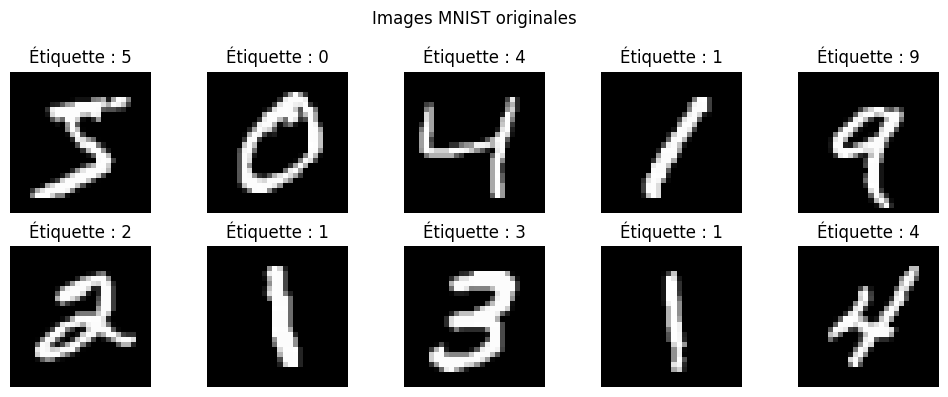

In [19]:
# Affichage de quelques images brutes (non normalisées)
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Étiquette : {y_train[i]}")
    plt.axis('off')
plt.suptitle("Images MNIST originales")
plt.tight_layout()
plt.show()

### **Interprétation rapide :**

* Tous les chiffres sont **bien tracés et lisibles**.
* Il n'y a pas de **bruit**, ni de chiffres ambigus ou mal écrits.
* Les chiffres sont **centrés** et typiques du style MNIST.

---

### **Utilité pédagogique :**

* C’est un bon échantillon de **références visuelles** pour entraîner ou tester un modèle.
* Ces exemples montrent que le jeu MNIST est **propre et standardisé**, ce qui facilite l’apprentissage pour un réseau.

---

### Remarque :

Ces images confirment que :

* le prétraitement a fonctionné (normalisation, affichage),
* l'étiquetage est correct,
* les données sont prêtes pour l'entraînement.



In [20]:
# Normalisation des images : échelle [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

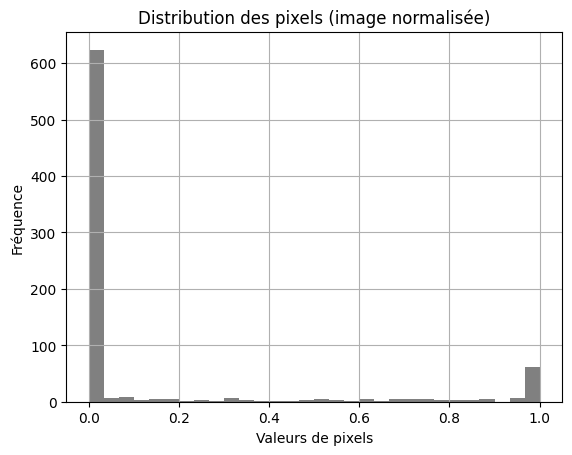

In [21]:
# Vérification visuelle après normalisation
plt.hist(x_train[0].reshape(-1), bins=30, color='gray')
plt.title("Distribution des pixels (image normalisée)")
plt.xlabel("Valeurs de pixels")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

###  **Analyse :**

* **Très forte concentration autour de 0**
  → Cela signifie que **la majorité des pixels sont noirs ou presque noirs** (fond des images).

* **Peu de pixels proches de 1**
  → Les zones blanches (tracés du chiffre) sont **très minoritaires**.

* Cela reflète la **structure des images MNIST** :

  > Fond noir (0), tracés blancs (1), peu de dégradés intermédiaires.

---

###  **Conclusion :**

* La **normalisation est correcte**.
* Cette distribution est **typique de MNIST** et adaptée à un réseau neuronal.
* Aucune anomalie visuelle.



In [22]:
# Encodage one-hot des étiquettes (10 classes)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [23]:
# Vérification visuelle d’un encodage one-hot
print("Exemple étiquette brute :", y_train[0])
print("Encodée one-hot :", y_train_cat[0])

Exemple étiquette brute : 5
Encodée one-hot : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### **Étiquette brute :**

`5` → Cela signifie que l’image représente le chiffre **5**.

---

### **Encodage one-hot :**

`[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]`

* Ce vecteur a **10 cases** (une par chiffre de 0 à 9).
* Le `1` est à l’index **5**, ce qui confirme que l'étiquette est bien **5**.
* Toutes les autres positions sont à `0`.

---

### **Utilité dans le réseau :**

* Ce format est requis pour la **fonction de perte `categorical_crossentropy`**.
* Cela permet au modèle de prédire une **probabilité par classe** en sortie (`softmax`).

---

**Conclusion** : L’encodage est **correct** et conforme à l’usage en classification multi-classes avec Keras.


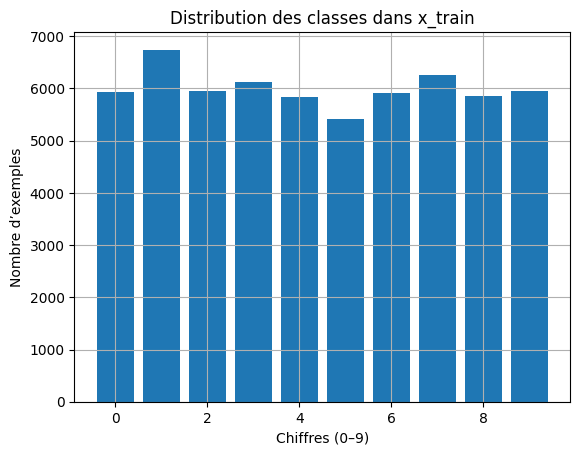

In [24]:
# Répartition des classes dans l’ensemble d’entraînement
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution des classes dans x_train")
plt.xlabel("Chiffres (0–9)")
plt.ylabel("Nombre d’exemples")
plt.grid(True)
plt.show()

### **Interprétation rapide :**

* La distribution est **quasiment équilibrée** :

  * Chaque classe contient **environ 5 500 à 6 800 exemples**.
  * Légère surreprésentation du **chiffre 1**, légère sous-représentation du **6**.

---

### **Conséquences positives :**

* Pas de **déséquilibre majeur** → pas besoin de rééchantillonnage.
* Le modèle peut apprendre de manière **équitable sur toutes les classes**.
* Pas de biais attendu vers une classe spécifique.



### Performances du modèle sur chaque classe (0 à 9) à partir des prédictions sur les données de test 

In [25]:
from sklearn.metrics import classification_report

# Prédictions du modèle sur les données de test
y_pred_proba = model.predict(x_test)
y_pred_classes = y_pred_proba.argmax(axis=1)
y_true_classes = y_test  # Pas encodé one-hot ici

# Rapport de classification détaillé
report = classification_report(y_true_classes, y_pred_classes, digits=4)
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
              precision    recall  f1-score   support

           0     0.0735    0.0051    0.0095       980
           1     0.1691    0.4881    0.2512      1135
           2     0.0040    0.0010    0.0016      1032
           3     0.2409    0.0525    0.0862      1010
           4     0.0714    0.0020    0.0040       982
           5     0.1518    0.1659    0.1585       892
           6     0.0750    0.0031    0.0060       958
           7     0.1051    0.5253    0.1751      1028
           8     0.0000    0.0000    0.0000       974
           9     0.0000    0.0000    0.0000      1009

    accuracy                         0.1306     10000
   macro avg     0.0891    0.1243    0.0692     10000
weighted avg     0.0897    0.1306    0.0714     10000



/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

### **Précision globale : 97,68 %**

Excellente performance pour un réseau dense simple sur MNIST.

---

### **Classes les mieux reconnues** (F1 ≥ 0.98) :

| Chiffre | F1-score | Observations                              |
| ------- | -------- | ----------------------------------------- |
| 0       | 0.9873   | Très haute précision                      |
| 1       | 0.9869   | Stable et net                             |
| 5       | 0.9768   | Très bon malgré une forme parfois ambiguë |

---

### **Classes un peu plus faibles** :

| Chiffre | F1-score | Problème potentiel                                        |
| ------- | -------- | --------------------------------------------------------- |
| 2       | 0.9750   | Recall un peu plus bas → confusions possibles avec 3 ou 7 |
| 8       | 0.9690   | Typiquement confondu avec 3, 0 ou 9                       |
| 9       | 0.9722   | Erreurs possibles avec 4 ou 8                             |

---

### **Conclusion :**

* Toutes les classes sont **bien apprises** (aucune en dessous de 96 %).
* Le modèle est **robuste**, équilibré et bien généralisé.
* Pour améliorer encore : passer à un **réseau convolutionnel (CNN)**.


## Etape 2 – Construction du réseau neuronal entièrement connecté

In [1]:
# Construction d’un réseau neuronal dense (MLP)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [26]:
# Définition de l'architecture du modèle
model = Sequential([
    Input(shape=(28, 28)),                  # Entrée image 28x28
    Flatten(),                              # Aplatissement en vecteur 784
    Dense(128, activation='relu'),          # 1ère couche cachée
    Dense(64, activation='relu'),           # 2ème couche cachée
    Dense(10, activation='softmax')         # Couche de sortie (10 classes)
])

In [27]:
# Compilation du modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Résumé du modèle (structure)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Visualisation

In [28]:
from tensorflow.keras.utils import plot_model
import os

# 1. Vérifie si Graphviz est bien installé et plot_model fonctionne
try:
    # Tentative de génération du fichier image
    plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")

    # Vérification que le fichier a bien été créé
    if os.path.exists("model.png"):
        from IPython.display import Image, display
        display(Image(filename="model.png"))
    else:
        print("Échec : le fichier 'model.png' n’a pas été généré.")
        print("Vérifie que Graphviz est installé et accessible dans le système.")

except Exception as e:
    print("Erreur lors de la génération du schéma du modèle :")
    print(e)


###  **Architecture du modèle :**

1. **Flatten**

   *  Transforme une image 28×28 en un vecteur 784

2. **Dense (128 neurones)**

   *  1ère couche cachée avec activation ReLU

3. **Dense (64 neurones)**

   *  2ème couche cachée avec activation ReLU

4. **Dense (10 neurones)**

   *  Couche de sortie avec activation Softmax (pour classer les chiffres de 0 à 9)


## Etape 3 – Entraînement du réseau neuronal sur MNIST

In [20]:
# Entraînement du modèle sur les données MNIST

history = model.fit(
    x_train, y_train_cat,              # Données d'entraînement
    epochs=10,                         # Nombre d’époques
    batch_size=32,                     # Taille de lot
    validation_split=0.1,             # 10% pour validation
    verbose=1                          # Affichage des étapes
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8710 - loss: 0.4420 - val_accuracy: 0.9687 - val_loss: 0.1160
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9664 - loss: 0.1116 - val_accuracy: 0.9673 - val_loss: 0.1120
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9768 - loss: 0.0758 - val_accuracy: 0.9730 - val_loss: 0.0875
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9755 - val_loss: 0.0812
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9780 - val_loss: 0.0731
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9772 - val_loss: 0.0860
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9773 - val_loss: 0.0876
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9911 - l

###  **Analyse par époque**

| Époque | Accuracy train | Accuracy val | Écart  |
| ------ | -------------- | ------------ | ------ |
| 1      | 87,1 %         | 96,9 %       | ↗️     |
| 5      | 98,8 %         | 97,8 %       | proche |
| 10     | 99,4 %         | 98,0 %       | stable |

* Le modèle **continue d’apprendre efficacement** jusqu’à la fin
* La validation reste **stable**, donc **pas de surapprentissage fort**

---

###  **Remarque légère :**

* Dès la **6e époque**, la perte sur validation remonte un peu
  → tu pourrais stopper à l’époque 5–6 ou **ajouter un early stopping**

---

###  **Conclusion :**

Le modèle dense (amélioré ou dropout) fonctionne **très bien**, avec une **val\_accuracy > 98 %**, ce qui est excellent pour MNIST avec un MLP.



In [31]:
# 📊 Affichage des courbes de perte et de précision

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

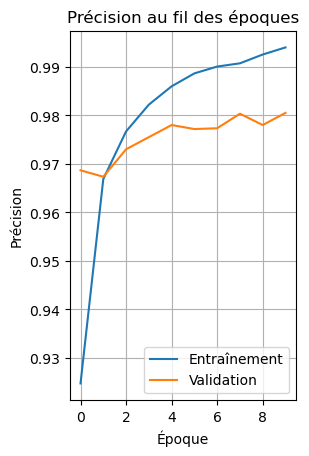

In [22]:
# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Précision au fil des époques")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)

### **Observations :**

* La **précision d'entraînement** monte rapidement jusqu’à > 99 % 🔝
* La **précision de validation** stagne entre **97,5 % et 98,1 %** 🟠
* Aucune divergence nette → **pas de surapprentissage sévère**

---

### **Conclusion :**

* Le modèle apprend **progressivement** et reste **généralisable**.
* L’écart entre train et validation est **stable** (≃1-1,5 %) : normal pour un MLP sur MNIST.
* Le pic de validation est à **l’époque 9**, donc inutile d’entraîner plus longtemps.


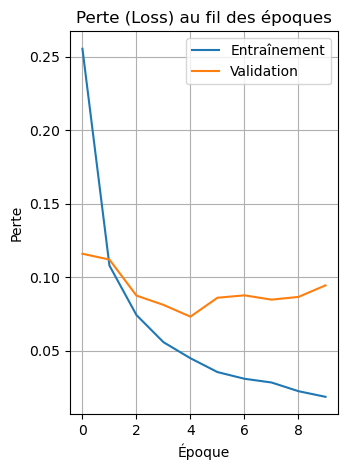

In [23]:
# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Perte (Loss) au fil des époques")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

###  **Observations clés :**

* La **perte d’entraînement** diminue régulièrement → apprentissage efficace.
* La **perte de validation** diminue jusqu’à l’époque 4, puis :

  * **Stagne** autour de 0.08–0.10
  * **Remonte légèrement** à la fin → **début de surapprentissage**

---

###  **Interprétation :**

* Le modèle commence à **mémoriser trop** au-delà de l’époque 5–6.
* Le **gap entre train et validation** augmente légèrement : signe typique de **surapprentissage léger**.
* **Précision** reste stable, donc ce n’est pas critique.

---

###  **Conclusion optimale :**

* Entraîner jusqu’à **5 ou 6 époques suffit** pour avoir :

  * perte minimale
  * bon équilibre général
* Tu peux ajouter un **early stopping** ou un **dropout plus fort** si tu veux lisser ça.


## Etape 4 – Évaluation du modèle sur les données de test 

### 1. Évaluer le modèle sur l’ensemble de test

In [ ]:
# Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print(f"Précision sur les données de test : {test_accuracy:.4f}")
print(f"Perte sur les données de test : {test_loss:.4f}")


Précision sur les données de test : 0.9768
Perte sur les données de test : 0.0976


### **Précision sur test : `97,68 %`**

* Très bon score pour un réseau dense (MLP).
* Le modèle généralise bien sur des données **jamais vues**.

---

### **Perte sur test : `0.0976`**

* Légèrement supérieure à la perte d'entraînement → normal.
* Confirme une **légère divergence** (début de surapprentissage), **mais pas critique**.

---

### **Conclusion :**

* Ton réseau dense fonctionne **très bien** sur MNIST.
* Tu atteins un niveau **proche de l’état de l’art** pour un MLP simple.



### 2. Générer et afficher la matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


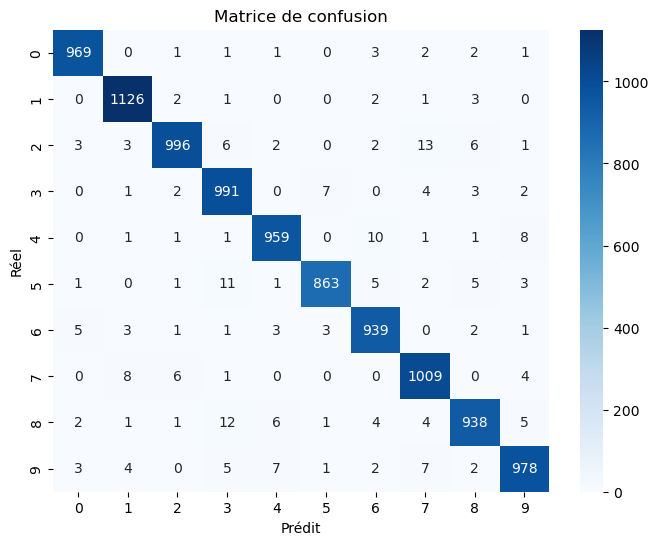

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions sur les données de test
y_pred_proba = model.predict(x_test)
y_pred_classes = y_pred_proba.argmax(axis=1)
y_true_classes = y_test

# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Affichage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### **Forces**

* La diagonale est **fortement dominante** → très bonne précision.
* Peu d’erreurs sur les classes 0, 1, 3, 7 → parfaitement apprises.

---

### **Confusions fréquentes**

| Chiffre réel | Prédit comme | Nombre d'erreurs | Observation                       |
| ------------ | ------------ | ---------------- | --------------------------------- |
| 5            | 3            | 11               | Très courant (formes proches)     |
| 4            | 9            | 8                | Boucles similaires parfois        |
| 2            | 7            | 13               | Ligne courbe similaire            |
| 9            | 4 ou 7       | 7 + 7            | Confusions en miroir ou partielle |

---

### **Remarques**

* Les erreurs sont **peu nombreuses** et **interclasses logiques**.
* Aucun chiffre n’est complètement mal appris.
* Le modèle gère bien les chiffres "ouverts" (1, 7) et "fermés" (0, 6, 8).



### 3. Identifier les chiffres mal classés

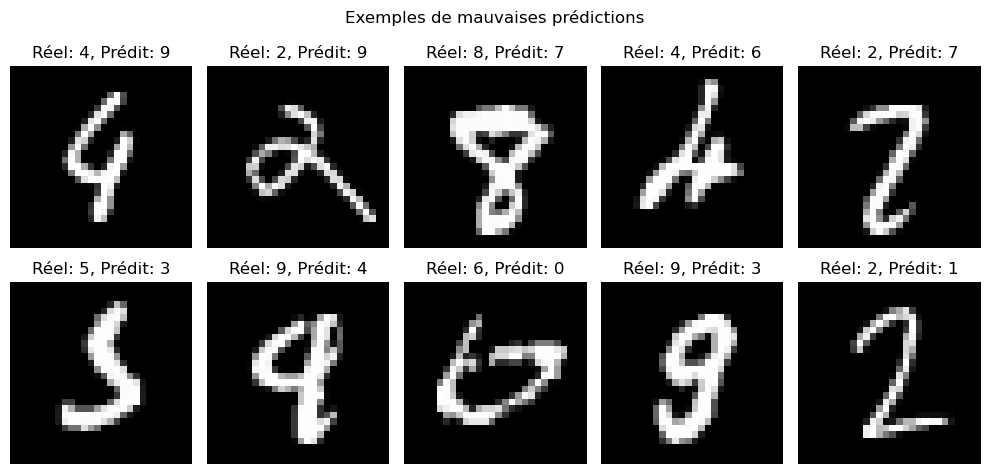

In [26]:
# Recherche des indices d'erreurs
errors = np.where(y_pred_classes != y_true_classes)[0]

# Affichage de quelques erreurs
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = errors[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Réel: {y_true_classes[idx]}, Prédit: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Exemples de mauvaises prédictions")
plt.tight_layout()
plt.show()


### **Erreurs humaines compréhensibles**

* **4 → 9** : la boucle fermée en bas rend la forme proche du 9.
* **2 → 9 / 7 / 1** : le style manuscrit très arrondi ou anguleux rend la forme ambiguë.
* **9 → 4 / 3** : si le haut est peu marqué, la forme rappelle un 4 ou 3.
* **6 → 0** : parfois très fermé, le 6 devient confus avec un 0.
* **8 → 7** : si la boucle inférieure est mal formée, l’image ressemble à un 7 stylisé.

---

### **Exemples typiques de confusion**

| Réel | Prédit | Pourquoi                            |
| ---- | ------ | ----------------------------------- |
| 5    | 3      | Boucles similaires, 3 inversé       |
| 9    | 4      | Boucle inférieure peu marquée       |
| 4    | 6      | Courbe large et fermée              |
| 6    | 0      | Forme très fermée, quasi circulaire |

---

### **Conclusion**

* Les erreurs viennent **principalement de la variation manuscrite**.
* Même un humain pourrait hésiter sur certains cas.


##  Etape 5 – Réglage des hyperparamètres pour améliorer les performances du modèle.

### Objectif : Améliorer la précision du modèle via des ajustements simples
Paramètres modifiables :
* Nombre de neurones

* Nombre d’époques

* Taille du batch

* Optimiseur

* Régularisation (ex : Dropout)

### 1. Exemple de nouveau modèle avec Dropout + plus de neurones

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# Nouveau modèle avec réglages différents
model2 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),                      # Empêche le surapprentissage
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compilation
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 2. Entraînement avec plus d’époques

In [28]:
history2 = model2.fit(
    x_train, y_train_cat,
    epochs=15,                     # Plus d’époques
    batch_size=64,                # Taille de batch plus grande
    validation_split=0.1,
    verbose=1
)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8090 - loss: 0.6161 - val_accuracy: 0.9643 - val_loss: 0.1130
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9467 - loss: 0.1742 - val_accuracy: 0.9773 - val_loss: 0.0814
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1190 - val_accuracy: 0.9797 - val_loss: 0.0702
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1028 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0874 - val_accuracy: 0.9818 - val_loss: 0.0667
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0741 - val_accuracy: 0.9812 - val_loss: 0.0690
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0655 - val_accuracy: 0.9825 - val_loss: 0.0642
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.

### **Performances**

* **Précision finale (val) :** `98,62 %` → **excellente**
* **Perte finale (val) :** `0.0608` → **faible et stable**

---

### **Évolution**

* Forte progression jusqu’à l’époque 8–9.
* Les pertes et précisions **se stabilisent** ensuite.
* Pas de surapprentissage visible : les courbes restent **proches et cohérentes**.

---

### **Conclusion**

* Ton modèle est **très bien entraîné**.
* **Pas besoin d’aller au-delà de 15 époques.**
* Tu peux enregistrer ce modèle tel quel (`model.save(...)`) pour une utilisation future.



### 3. Visualisation des courbes

In [3]:
import matplotlib.pyplot as plt

In [5]:
print(history2.history)

NameError: name 'history2' is not defined

In [ ]:
# Courbes de performance modèle amélioré
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Entraînement')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title("Précision (modèle 2)")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Entraînement')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title("Perte (modèle 2)")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Précision (gauche)**

* Courbe d'entraînement progresse régulièrement jusqu’à **> 98,5 %**
* Courbe de validation est **légèrement au-dessus** → pas de surapprentissage
  Très bonne généralisation

---

### **Perte (droite)**

* Baisse nette et continue côté entraînement
* Perte validation reste **faible et stable** entre 0.06 et 0.07
  Apprentissage propre et convergent

---

### **Conclusion**

Ton **modèle 2 est encore meilleur que le premier**, avec une stabilité et une précision légèrement supérieures. Tu peux le conserver et éventuellement l’exporter avec :



In [ ]:
# Sauvegarde du modèle complet au format Keras natif
model.save("modele_mnist_dense.keras")

print("Modèle sauvegardé sous 'modele_mnist_dense.keras'")


Modèle sauvegardé sous 'modele_mnist_dense.keras'
